In [1]:
import fluentpy as _

These are solutions for the Advent of Code puzzles of 2018 in the hopes that this might inspire the reader how to use the fluentpy api to solve problems.

See https://adventofcode.com/2018/ for the problems.

The goal of this is not to produce minimal code or neccessarily to be as clear as possible, but to showcase as many of the features of fluentpy. Pull requests to use more of fluentpy are welcome!

I do hope however that you find the solutions relatively succinct as your understanding of how fluentpy works grows.

# Day 1

https://adventofcode.com/2018/day/1

In [2]:
_(open('input/day1.txt')).read().replace('\n','').call(eval)._

406

In [3]:
day1_input = (
    _(open('input/day1.txt'))
    .readlines()
    .imap(eval)
    ._
)

seen = set()
def havent_seen(number):
    if number in seen:
        return False
    seen.add(number)
    return True


(
    _(day1_input)
    .icycle()
    .iaccumulate()
    .idropwhile(havent_seen)
    .get(0)
    ._
)

312

# Day 2

https://adventofcode.com/2018/day/2

In [4]:
day2 = open('input/day2.txt').readlines()

In [5]:
def has_two_or_three(code):
    counts = _.lib.collections.Counter(code).values()
    return 2 in counts, 3 in counts

twos, threes = _(day2).map(has_two_or_three).star_call(zip).to(tuple)._

sum(twos) * sum(threes)

6888

In [6]:
def is_different_by_only_one_char(codes):
    # REFACT consider how to more effectively vectorize this function
    # i.e. map ord, elementwise minus, count non zeroes == 1
    code1, code2 = codes
    diff_count = 0
    for index, char in enumerate(code1):
        if char != code2[index]:
            diff_count += 1
    return 1 == diff_count

(
    _(day2)
    .icombinations(r=2)
    .ifilter(is_different_by_only_one_char)
    .get(0)
    .star_call(zip)
    .filter(lambda pair:  pair[0] == pair[1])
    .star_call(zip)
    .get(0)
    .join('')
    ._
)

'icxjvbrobtunlelzpdmfkahgs\n'

# Day 3

In [7]:
line_regex = r'#(\d+) @ (\d+),(\d+): (\d+)x(\d+)'
class Entry(_.lib.collections.namedtuple('Entry', ['id', 'left', 'top', 'width', 'height'])._):
    
    def coordinates(self):
        return _.lib.itertools.product._(
            range(claim.left, claim.left + claim.width),
            range(claim.top, claim.top + claim.height)
        )

def parse_day3(line):
    return _(line).match(line_regex).groups().map(int).star_call(Entry)._

day3 = _(open('input/day3.txt')).read().splitlines().map(parse_day3)._

In [8]:
plane = dict()
for claim in day3:
    for coordinate in claim.coordinates():
        plane[coordinate] = plane.get(coordinate, 0) + 1
_(plane).values().filter(_.each != 1).len()._

120419

In [9]:
for claim in day3:
    if _(claim.coordinates()).imap(lambda each: plane[each] == 1).all()._:
        print(claim.id)

445


# Day 4

In [10]:
day4_lines = _(open('input/day4.txt')).read().splitlines().sort().self._

In [11]:
class Sleep(_.lib.collections.namedtuple('Sleep', ['duty_start', 'sleep_start', 'sleep_end'])._):
    
    def minutes(self):
        return (self.sleep_end - self.sleep_start).seconds // 60

class Guard:
    def __init__(self, guard_id, sleeps=None):
        self.id = guard_id
        self.sleeps = sleeps or list()
    
    def minutes_asleep(self):
        return _(self.sleeps).map(_.each.minutes()._).sum()._
    
    def minutes_and_sleep_counts(self):
        distribution = dict()
        for sleep in self.sleeps:
            # problematic if the hour wraps, but it never does, see check below
            for minute in range(sleep.sleep_start.minute, sleep.sleep_end.minute):
                distribution[minute] = distribution.get(minute, 0) + 1

        return _(distribution).items().sorted(key=_.each[1]._, reverse=True)._
    
    def minute_most_asleep(self):
        return _(self.minutes_and_sleep_counts()).get(0, tuple()).get(0, 0)._
    
    def number_of_most_sleeps(self):
        return _(self.minutes_and_sleep_counts()).get(0, tuple()).get(1, 0)._

In [12]:
guards = dict()
current_guard = current_duty_start = current_sleep_start = None

for line in day4_lines:
    time = _.lib.datetime.datetime.fromisoformat(line[1:17])._
    if 'Guard' in line:
        guard_id = _(line[18:]).match(r'.*?(\d+).*?').group(1).call(int)._
        current_guard = guards.setdefault(guard_id, Guard(guard_id))
        current_duty_start = time
    if 'falls asleep' in line:
        current_sleep_start = time
    if 'wakes up' in line:
        current_guard.sleeps.append(Sleep(current_duty_start, current_sleep_start, time))

In [13]:
# confirm that we don't really have to do real date calculations but can just work with simplified values
for guard in guards.values():
    for sleep in guard.sleeps:
        assert sleep.sleep_start.minute < sleep.sleep_end.minute
        assert sleep.sleep_start.hour == 0
        assert sleep.sleep_end.hour == 0

In [14]:
guard = (
    _(guards)
    .values()
    .sorted(key=Guard.minutes_asleep, reverse=True)
    .get(0)
    ._
)
guard.id * guard.minute_most_asleep()

119835

In [15]:
guard = (
    _(guards)
    .values()
    .sorted(key=Guard.number_of_most_sleeps, reverse=True)
    .get(0)
    ._
)
guard.id * guard.minute_most_asleep()

12725

# Day 5

In [16]:
day5 = _(open('input/day5.txt')).read().strip()._

In [17]:
def is_reacting(a_polymer, an_index):
    if an_index+2 > len(a_polymer):
        return False
    first, second = a_polymer[an_index:an_index+2]
    return first.swapcase() == second

def reduce(a_polymer):
    for index in range(len(a_polymer) - 2, -1, -1):
        if is_reacting(a_polymer, index):
            a_polymer = a_polymer[:index] + a_polymer[index+2:]
    return a_polymer

def fully_reduce(a_polymer):
    last_polymer = current_polymer = a_polymer
    while True:
        last_polymer, current_polymer = current_polymer, reduce(current_polymer)
        if last_polymer == current_polymer:
            break
    return current_polymer

In [18]:
len(fully_reduce(day5))

11252

In [19]:
alphabet = _(range(26)).map(_.each + ord('a')).map(chr)._
shortest_length = float('inf')
for char in alphabet:
    polymer = day5.replace(char, '').replace(char.swapcase(), '')
    length = len(fully_reduce(polymer))
    if length < shortest_length:
        shortest_length = length

shortest_length

6118

# Day 6

In [20]:
Point = _.lib.collections.namedtuple('Point', ['x', 'y'])._
day6_coordinates = (
    _(open('input/day6.txt'))
    .read()
    .splitlines()
    .map(lambda each: _(each).split(', ').map(int).star_call(Point)._)
    ._
)

In [25]:
def manhatten_distance(first, second):
    return abs(first.x - second.x) + abs(first.y - second.y)

def nearest_two_points_and_distances(a_point):
    return (
        _(day6_coordinates)
        .imap(lambda each: (each, manhatten_distance(each, a_point)))
        .sorted(key=_.each[1]._)
        .slice(2)
        ._
    )

def has_nearest_point(a_point):
    (nearest_point, nearest_distance), (second_point, second_distance) \
        = nearest_two_points_and_distances(a_point)
    return nearest_distance < second_distance

def nearest_point(a_point):
    return nearest_two_points_and_distances(a_point)[0][0]

def plane_extent():
    all_x, all_y = _(day6_coordinates).imap(lambda each: (each.x, each.y)).star_call(zip).to(tuple)._
    min_x, min_y = min(all_x) - 1, min(all_y) - 1
    max_x, max_y = max(all_x) + 2, max(all_y) + 2
    return (
        (min_x, min_y),
        (max_x, max_y)
    )

def compute_bounding_box():
    (min_x, min_y), (max_x, max_y) = plane_extent()
    return _.lib.itertools.chain(
        (Point(x, min_y) for x in range(min_x, max_x)),
        (Point(x, max_y) for x in range(min_x, max_x)),
        (Point(min_x, y) for y in range(min_y, max_y)),
        (Point(max_x, y) for y in range(min_y, max_y)),
    ).to(tuple)._
bounding_box = compute_bounding_box()

def internal_points():
    # no point on bounding box is nearest to it
    external_points = _(bounding_box).map(nearest_point).to(set)._
    return set(day6_coordinates) - external_points

def points_by_number_of_nearest_points():
    plane = dict()
    (min_x, min_y), (max_x, max_y) = plane_extent()
    for x in range(min_x, max_x):
        for y in range(min_y, max_y):
            point = Point(x,y)
            if has_nearest_point(point):
                plane[point] = nearest_point(point)
    
    plane_points = _(plane).values().to(tuple)._
    counts = dict()
    for point in internal_points():
        counts[point] = plane_points.count(point)
    return counts

In [26]:
points = points_by_number_of_nearest_points()
_(points).items().sorted(key=_.each[1]._, reverse=True).get(0)._

(Point(x=102, y=101), 3251)

In [23]:
def total_distance(a_point):
    return (
        _(day6_coordinates)
        .imap(lambda each: manhatten_distance(a_point, each))
        .sum()
        ._
    )

def number_of_points_with_total_distance_less(a_limit):
    plane = dict()
    (min_x, min_y), (max_x, max_y) = plane_extent()
    for x in range(min_x, max_x):
        for y in range(min_y, max_y):
            point = Point(x,y)
            plane[point] = total_distance(point)
    
    return (
        _(plane)
        .values()
        .ifilter(_.each < a_limit)
        .len()
        ._
    )

In [24]:
number_of_points_with_total_distance_less(10000)

47841

# Day 7

https://adventofcode.com/2018/day/7

In [27]:
import fluentpy as _

In [28]:
day7_input = (
    _(open('input/day7.txt'))
    .read()
    .findall(r'Step (\w) must be finished before step (\w) can begin.', flags=_.lib.re.M._)
    ._
)

In [29]:
def execute_in_order(dependencies):
    prerequisites = dict()
    _(dependencies).each(lambda each: prerequisites.setdefault(each[1], []).append(each[0]))
    all_jobs = _(dependencies).flatten().call(set)._
    ready_jobs = all_jobs - prerequisites.keys()
    done_jobs = []
    
    while 0 != len(ready_jobs):
        current_knot = _(ready_jobs).sorted()[0]._
        ready_jobs.discard(current_knot)
        done_jobs.append(current_knot)
        for knot in all_jobs.difference(done_jobs):
            if set(done_jobs).issuperset(prerequisites.get(knot, [])):
                ready_jobs.add(knot)


    return _(done_jobs).join('')._
execute_in_order(day7_input)

'BDHNEGOLQASVWYPXUMZJIKRTFC'

In [30]:
def cached_property(cache_instance_variable_name):
    def outer_wrapper(a_method):
        @property
        @_.lib.functools.wraps._(a_method)
        def wrapper(self):
            if not hasattr(self, cache_instance_variable_name):
                setattr(self, cache_instance_variable_name, a_method(self))
            return getattr(self, cache_instance_variable_name)
        return wrapper
    return outer_wrapper
    
class Jobs:
    def __init__(self, dependencies, delays):
        self.dependencies = dependencies
        self.delays = delays
        
        self._ready = self.all.difference(self.prerequisites.keys())
        self._done = []
        self._in_progress = set()
    
    @cached_property('_prerequisites')
    def prerequisites(self):
        prerequisites = dict()
        for prerequisite, job in self.dependencies:
            prerequisites.setdefault(job, []).append(prerequisite)
        return prerequisites
    
    @cached_property('_all')
    def all(self):
        return _(self.dependencies).flatten().call(set)._
    
    def can_start(self, a_job):
        return set(self._done).issuperset(self.prerequisites.get(a_job, []))
    
    def has_ready_jobs(self):
        return 0 != len(self._ready)
    
    def get_ready_job(self):
        assert self.has_ready_jobs()
        
        current_job = _(self._ready).sorted()[0]._
        self._ready.remove(current_job)
        self._in_progress.add(current_job)
        
        return current_job, self.delays[current_job]
    
    def set_job_done(self, a_job):
        assert a_job in self._in_progress
        
        self._done.append(a_job)
        self._in_progress.remove(a_job)
        
        for job in self.unstarted():
            if self.can_start(job):
                self._ready.add(job)
    
    def unstarted(self):
        return self.all.difference(self._in_progress.union(self._done))
    
    def is_done(self):
        return set(self._done) == self.all
    
    def __repr__(self):
        return f'<Jobs(in_progress={self._in_progress}, done={self._done})>'

@_.lib.dataclasses.dataclass._
class Worker:
    id: int
    delay: int
    current_job: str
    
    jobs: Jobs
    
    def work_a_second(self):
        self.delay -= 1
        
        if self.delay <= 0:
            self.finish_job_if_working()
            self.accept_job_if_available()
    
    def finish_job_if_working(self):
        if self.current_job is None:
            return
        
        self.jobs.set_job_done(self.current_job)
        self.current_job = None
    
    def accept_job_if_available(self):
        if not self.jobs.has_ready_jobs():
            return
        
        self.current_job, self.delay = self.jobs.get_ready_job()

def execute_in_parallel(dependencies, delays, number_of_workers):
    jobs = Jobs(dependencies, delays)
    workers = _(range(number_of_workers)).map(_(Worker).curry(
        id=_,
        delay=0, current_job=None, jobs=jobs,
    )._)._
    
    seconds = -1
    while not jobs.is_done():
        seconds += 1
        _(workers).each(_.each.work_a_second()._)

    return seconds


In [31]:
test_input = (('C', 'A'), ('C', 'F'), ('A', 'B'), ('A', 'D'), ('B', 'E'), ('D', 'E'), ('F', 'E'))
test_delays = _(range(1,27)).map(lambda each: (chr(ord('A') + each - 1), each)).call(dict)._
execute_in_parallel(test_input, test_delays, 2)

15

In [32]:
day7_delays = _(range(1,27)).map(lambda each: (chr(ord('A') + each - 1), 60 + each)).call(dict)._

assert 1107 == execute_in_parallel(day7_input, day7_delays, 5)
execute_in_parallel(day7_input, day7_delays, 5)

1107

# Day 8

https://adventofcode.com/2018/day/8

In [33]:
import fluentpy as _

In [34]:
@_.lib.dataclasses.dataclass._
class Node:
    children: tuple
    metadata: tuple
    
    @classmethod
    def parse(cls, number_iterator):
        child_count = next(number_iterator)
        metadata_count = next(number_iterator)
        return cls(
            children=_(range(child_count)).map(lambda ignored: Node.parse(number_iterator))._,
            metadata=_(range(metadata_count)).map(lambda ignored: next(number_iterator))._,
        )
    
    def sum_all_metadata(self):
        return sum(self.metadata) + _(self.children).imap(_.each.sum_all_metadata()._).sum()._
    
    def value(self):
        if 0 == len(self.children):
            return sum(self.metadata)
        
        return (
            _(self.metadata)
            .imap(_.each - 1) # convert to indexes
            .ifilter(_.each >= 0)
            .ifilter(_.each < len(self.children))
            .imap(self.children.__getitem__)
            .map(Node.value)
            .sum()
            ._
        )

In [35]:
test_input = (2,3,0,3,10,11,12,1,1,0,1,99,2,1,1,2)
test_node = Node.parse(iter(test_input))

assert 138 == test_node.sum_all_metadata()
assert 66 == test_node.value()

In [36]:
day8_input = _(open('input/day8.txt')).read().split(' ').map(int)._
node = Node.parse(iter(day8_input))
node.sum_all_metadata()

45210

# Day 9

https://adventofcode.com/2018/day/9

In [37]:
class Marble:
    
    def __init__(self, value):
        self.value = value
        self.prev = self.next = self
    
    def insert_after(self, a_marble):
        a_marble.next = self.next
        a_marble.prev = self
        
        a_marble.next.prev = a_marble.prev.next = a_marble
    
    def remove(self):
        self.prev.next = self.next
        self.next.prev = self.prev
        return self

class Circle:
    
    def __init__(self):
        self.current = None
    
    def play_marble(self, marble):
        if self.current is None:
            self.current = marble
            return 0 # normmal insert, no points, only happens once at the beginning
        elif marble.value % 23 == 0:
            removed = self.current.prev.prev.prev.prev.prev.prev.prev.remove()
            self.current = removed.next
            return marble.value + removed.value
        else:
            self.current.next.insert_after(marble)
            self.current = marble
            return 0 # normal insert, no points
        
def marble_game(player_count, marbles):
    player_scores = [0] * player_count
    circle = Circle()
    for marble_value in range(marbles + 1):
        player_scores[marble_value % player_count] += circle.play_marble(Marble(marble_value))
    return max(player_scores)

In [38]:
assert 8317 == marble_game(player_count=10, marbles=1618)
assert 146373 == marble_game(player_count=13, marbles=7999)
assert 2764 == marble_game(player_count=17, marbles=1104)
assert 54718 == marble_game(player_count=21, marbles=6111)
assert 37305 == marble_game(player_count=30, marbles=5807)

In [39]:
marble_game(player_count=455, marbles=71223)

384288

In [40]:
marble_game(player_count=455, marbles=71223*100)

3189426841

# Day 10

https://adventofcode.com/2018/day/10

In [41]:
@_.lib.dataclasses.dataclass._
class Particle:
    x: int
    y: int
    delta_x: int
    delta_y: int

In [42]:
day10_input = (
    _(open('input/day10.txt'))
    .read()
    .findall(r'position=<\s?(-?\d+),\s+(-?\d+)> velocity=<\s*(-?\d+),\s+(-?\d+)>')
    .map(lambda each: _(each).map(int)._)
    .call(list)
    ._
)


In [43]:
%matplotlib inline

In [44]:
def evolve(particles):
    particles.x += particles.delta_x
    particles.y += particles.delta_y

def devolve(particles):
    particles.x -= particles.delta_x
    particles.y -= particles.delta_y

def show(particles):
    particles.y *= -1
    particles.plot(x='x', y='y', kind='scatter', s=1)
    particles.y *= -1

last_width = last_height = float('inf')
def particles_are_shrinking(particles):
    global last_width, last_height
    current_width = particles.x.max() - particles.x.min()
    current_height = particles.y.max() - particles.y.min()
    is_shrinking = current_width < last_width and current_height < last_height
    last_width, last_height = current_width, current_height
    return is_shrinking

In [45]:
particles = _.lib.pandas.DataFrame.from_records(
    data=day10_input, 
    columns=['x', 'y', 'delta_x', 'delta_y']
)._

10009

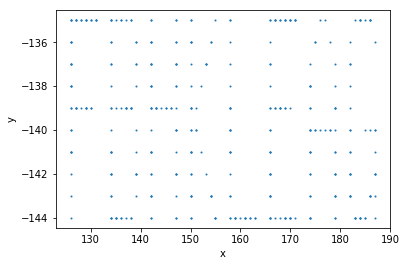

In [46]:
last_width = last_height = float('inf')
seconds = 0
while particles_are_shrinking(particles):
    evolve(particles)
    seconds += 1
devolve(particles)
show(particles)
seconds - 1

# Day 11

https://adventofcode.com/2018/day/11

In [47]:
import fluentpy as _
from pyexpect import expect

In [48]:
def power_level(x, y, grid_serial):
    rack_id = x + 10
    power_level = rack_id * y
    power_level += grid_serial
    power_level *= rack_id
    power_level //= 100
    power_level %= 10
    return power_level - 5

In [49]:
assert 4 == power_level(x=3, y=5, grid_serial=8)
assert -5 == power_level( 122,79, grid_serial=57)
assert  0 == power_level(217,196, grid_serial=39)
assert  4 == power_level(101,153, grid_serial=71)

In [50]:
def power_levels(grid_serial):
    return (
        _(range(1, 301))
        .product(repeat=2)
        .star_map(_(power_level).curry(x=_, y=_, grid_serial=grid_serial)._)
        .to(_.lib.numpy.array)
        ._
        .reshape(300, -1)
        .T
    )

In [51]:
def compute_max_power(matrix, subset_size):
    expect(matrix.shape[0]) == matrix.shape[1]
    expect(subset_size) <= matrix.shape[0]
    expect(subset_size) > 0
    
    # +1 because 300 matrix by 300 subset should produce one value
    width = matrix.shape[0] - subset_size + 1
    height = matrix.shape[1] - subset_size + 1
    output = _.lib.numpy.zeros((width, height))._
    for x in range(width):
        for y in range(height):
            output[x,y] = matrix[y:y+subset_size, x:x+subset_size].sum()
    return output

def coordinates_with_max_power(matrix, subset_size=3):
    output = compute_max_power(matrix, subset_size=subset_size)
    np = _.lib.numpy._
    index = np.unravel_index(np.argmax(output), output.shape)
    return (
        _(index).map(_.each + 1)._, # turn back into coordinates
        np.amax(output)
    )

In [52]:
result = coordinates_with_max_power(power_levels(18))
assert ((33, 45), 29) == result, result
result = coordinates_with_max_power(power_levels(42))
assert ((21, 61), 30) == result, result

In [53]:
coordinates_with_max_power(power_levels(5034))

((235, 63), 29.0)

In [54]:
def find_best_subset(matrix):
    best_max_power = best_subset_size = float('-inf')
    best_coordinates = None
    for subset_size in range(1, matrix.shape[0] + 1):
        coordinates, max_power = coordinates_with_max_power(matrix, subset_size=subset_size)
        if max_power > best_max_power:
            best_max_power = max_power
            best_subset_size = subset_size
            best_coordinates = coordinates
    return (
        best_coordinates,
        best_subset_size,
        best_max_power,
    )

In [55]:
result = coordinates_with_max_power(power_levels(18), subset_size=16)
expect(result) == ((90, 269), 113) 
result = coordinates_with_max_power(power_levels(42), subset_size=12)
expect(result) == ((232, 251), 119)

In [56]:
result = find_best_subset(power_levels(18))
expect(result) == ((90, 269), 16, 113)

In [57]:
find_best_subset(power_levels(5034))

((229, 251), 16, 109.0)

# Day 12

https://adventofcode.com/2018/day/12

In [58]:
import fluentpy as _

In [59]:
def parse(a_string):
    is_flower = _.each == '#'
    initial_state = (
        _(a_string)
        .match(r'initial state:\s*([#.]+)')
        .group(1)
        .map(is_flower)
        .enumerate()
        .call(dict)
        ._
    )

    patterns = dict(
        _(a_string)
        .findall('([#.]{5})\s=>\s([#.])')
        .map(lambda each: (_(each[0]).map(is_flower)._, is_flower(each[1])))
        ._
    )
    return initial_state, patterns

def print_state(generation, state):
    lowest_offset = min(state)
    print(f'{generation:>5} {sum_state(state):>5} {lowest_offset:>5}: ', end='')
    print(string_from_state(state))

def string_from_state(state):
    lowest_offset, highest_offset = min(state), max(state)
    return (
        _(range(lowest_offset - 2, highest_offset + 3))
        .map(lambda each: state.get(each, False))
        .map(lambda each: each and '#' or '.')
        .join()
        ._
    )

def sum_state(state):
    return (
        _(state)
        .items()
        .map(lambda each: each[1] and each[0] or 0)
        .sum()
        ._
    )

def evolve(initial_state, patterns, number_of_generations, 
           show_sums=False, show_progress=False, show_state=False, stop_on_repetition=False):
    current_state = dict(initial_state)
    next_state = dict()
    
    def surrounding_of(state, index):
        return tuple(state.get(each, False) for each in range(index-2, index+3))
    
    def compute_next_generation():
        nonlocal current_state, next_state
        first_key, last_key = min(current_state), max(current_state)
        for index in range(first_key - 2, last_key + 2):
            is_flower = patterns.get(surrounding_of(current_state, index), False)
            if is_flower:
                next_state[index] = is_flower
        
        current_state, next_state = next_state, dict()
        return current_state
    
    seen = set()
    for generation in range(number_of_generations):
        if show_sums:
            print(generation, sum_state(current_state))
        if show_progress and generation % 1000 == 0: print('.', end='')
        if show_state: print_state(generation, current_state)
        if stop_on_repetition:
            stringified = string_from_state(current_state)
            if stringified in seen:
                print(f'repetition on generation {generation}')
                print(stringified)
                return current_state
            seen.add(stringified)
        
        compute_next_generation()
    
    return current_state

In [60]:
end_state = evolve(*parse("""initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #
"""), 20, show_state=True)
assert 325 == sum_state(end_state)

    0   145     0: ..#..#.#..##......###...###..
    1    91     0: ..#...#....#.....#..#..#..#..
    2   132     0: ..##..##...##....#..#..#..##..
    3   102    -1: ..#.#...#..#.#....#..#..#...#..
    4   154     0: ..#.#..#...#.#...#..#..##..##..
    5   115     1: ..#...##...#.#..#..#...#...#..
    6   174     1: ..##.#.#....#...#..##..##..##..
    7   126     0: ..#..###.#...##..#...#...#...#..
    8   213     0: ..#....##.#.#.#..##..##..##..##..
    9   138     0: ..##..#..#####....#...#...#...#..
   10   213    -1: ..#.#..#...#.##....##..##..##..##..
   11   136     0: ..#...##...#.#...#.#...#...#...#..
   12   218     0: ..##.#.#....#.#...#.#..##..##..##..
   13   133    -1: ..#..###.#....#.#...#....#...#...#..
   14   235    -1: ..#....##.#....#.#..##...##..##..##..
   15   149    -1: ..##..#..#.#....#....#..#.#...#...#..
   16   226    -2: ..#.#..#...#.#...##...#...#.#..##..##..
   17   170    -1: ..#...##...#.#.#.#...##...#....#...#..
   18   280    -1: ..##.#.#....#####.#.#

In [61]:
day12_input = open('input/day12.txt').read()
sum_state(evolve(*parse(day12_input), 20))

3337

In [62]:
# still very much tooo slow
number_of_iterations = 50000000000
#number_of_iterations = 200
sum_state(evolve(*parse(day12_input), number_of_iterations, stop_on_repetition=True))

repetition on generation 135
..####.#.....###.#.....####.#.....###.#.....###.#.....###.#....####.#.....###.#....####.#....####.#.....###.#.....####.#...####.#....###.#.....####.#....###.#.....###.#.....####.#....####.#..


11959

In [63]:
last_score = 11959
increment_per_generation = 11959 - 11873
last_generation = 135
generations_to_go = number_of_iterations - last_generation
end_score = last_score + generations_to_go * increment_per_generation
end_score

4300000000349

In [64]:
import fluentpy as _

In [65]:
# Numpy implementation for comparison
np = _.lib.numpy._

class State:
    
    @classmethod
    def parse_string(cls, a_string):
        is_flower = lambda each: int(each == '#')
        initial_state = (
            _(a_string)
            .match(r'initial state:\s*([#\.]+)')
            .group(1)
            .map(is_flower)
            ._
        )

        patterns = (
            _(a_string)
            .findall('([#.]{5})\s=>\s([#\.])')
            .map(lambda each: (_(each[0]).map(is_flower)._, is_flower(each[1])))
            ._
        )
        return initial_state, patterns

    @classmethod
    def from_string(cls, a_string):
        return cls(*cls.parse_string(a_string))
    
    def __init__(self, initial_state, patterns):
        self.type = np.uint8
        self.patterns = self.trie_from_patterns(patterns)
        self.state = np.zeros(len(initial_state) * 3, dtype=self.type)
        self.zero = self.state.shape[0] // 2
        self.state[self.zero:self.zero+len(initial_state)] = initial_state
    
    def trie_from_patterns(self, patterns):
        trie = np.zeros((2,) * 5, dtype=self.type)
        for pattern, production in patterns:
            trie[pattern] = production
        return trie
    
    @property
    def size(self):
        return self.state.shape[0]
    
    def recenter_or_grow_if_neccessary(self):
        # check how much empty space there is, and if re-centering the pattern might be good enough
        if self.needs_resize() and self.is_region_empty(0, self.zero - self.size // 4):
            self.move(- self.size // 4)
        if self.needs_resize() and self.is_region_empty(self.zero + self.size // 4, -1):
            self.move(self.size // 4)
        if self.needs_resize():
            self.grow()

    def needs_resize(self):
        return any(self.state[:4]) or any(self.state[-4:])
    
    def is_region_empty(self, lower_limit, upper_limit):
        return not any(self.state[lower_limit:upper_limit])
    
    def move(self, move_by):
        assert move_by != 0
        new_state = np.zeros_like(self.state)
        if move_by < 0:
            new_state[:move_by] = self.state[-move_by:]
        else:
            new_state[move_by:] = self.state[:-move_by]
        self.state = new_state
        self.zero += move_by
    
    def grow(self):
        new_state = np.zeros(self.size * 2, dtype=self.type)
        move_by = self.zero - (self.size // 2)
        new_state[self.zero : self.zero + self.size] = self.state
        self.state = new_state
        self.zero -= move_by
    
    def evolve_once(self):
        self.state[2:-2] = self.patterns[
            self.state[:-4],
            self.state[1:-3],
            self.state[2:-2],
            self.state[3:-1],
            self.state[4:]
        ]
        
        self.recenter_or_grow_if_neccessary()
        
        return self
    
    def evolve(self, number_of_iterations, show_progress=False, show_state=False):
        while number_of_iterations:
            self.evolve_once()
            number_of_iterations -= 1
            
            if show_progress and number_of_iterations % 1000 == 0:
                print('.', end='')
            if show_state:
                self.print()
        return self
    
    def __repr__(self):
        return (
            _(self.state)
            .map(lambda each: each and '#' or '.')
            .join()
            ._
        )
    
    def print(self):
        print(f"{self.zero:>5} {self.sum():>5}", repr(self))
    
    def sum(self):
        return (
            _(self.state)
            .ienumerate()
            .imap(lambda each: each[1] and (each[0] - self.zero) or 0)
            .sum()
            ._
        )

In [66]:
test = State.from_string("""initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #
""")

assert 325 == test.evolve(20, show_state=True).sum(), test.sum()

   37    91 .....................................#...#....#.....#..#..#..#.............
   37   132 .....................................##..##...##....#..#..#..##............
   37   102 ....................................#.#...#..#.#....#..#..#...#............
   37   154 .....................................#.#..#...#.#...#..#..##..##...........
   37   115 ......................................#...##...#.#..#..#...#...#...........
   37   174 ......................................##.#.#....#...#..##..##..##..........
   37   126 .....................................#..###.#...##..#...#...#...#..........
   37   213 .....................................#....##.#.#.#..##..##..##..##.........
   37   138 .....................................##..#..#####....#...#...#...#.........
   37   213 ....................................#.#..#...#.##....##..##..##..##........
   37   136 .....................................#...##...#.#...#.#...#...#...#........
   37   218 ....................

In [67]:
# Much faster initially, but then gets linearly slower as the size of the memory increases. And since it increases linearly with execution time
# Its still way too slow
day12_input = open('input/day12.txt').read()
state = State.from_string(day12_input)
#state.evolve(50000000000, show_progress=True)
#state.evolve(10000, show_progress=True).print()

# Day 13

https://adventofcode.com/2018/day/13

In [68]:
import fluentpy as _
from pyexpect import expect

In [69]:
Location = _.lib.collections.namedtuple('Location', ('x', 'y'))._

UP, RIGHT, DOWN, LEFT, STRAIGHT = '^>v<|'
UPDOWN, LEFTRIGHT, UPRIGHT, RIGHTDOWN, DOWNLEFT, LEFTUP = '|-\/\/'
MOVEMENT = {
  '^' : Location(0, -1),
  '>' : Location(1, 0),
  'v' : Location(0, 1),
  '<' : Location(-1, 0)
}

CURVE = {
    '\\': { '^':'<', '<':'^', 'v':'>', '>':'v'},
    '/':  { '^':'>', '<':'v', 'v':'<', '>':'^'},
}

INTERSECTION = {
    '^': { LEFT:'<', STRAIGHT:'^', RIGHT:'>' },
    '>': { LEFT:'^', STRAIGHT:'>', RIGHT:'v' },
    'v': { LEFT:'>', STRAIGHT:'v', RIGHT:'<' },
    '<': { LEFT:'v', STRAIGHT:'<', RIGHT:'^' },
}


@_.lib.dataclasses.dataclass._
class Cart:
    location: Location
    orientation: str
    world: str
    program: iter = _.lib.dataclasses.field._(default_factory=lambda: _((LEFT, STRAIGHT, RIGHT)).icycle()._)
        
    def tick(self):
        move = MOVEMENT[self.orientation]
        self.location = Location(self.location.x + move.x, self.location.y + move.y)
        
        if self.world_at_current_location() in CURVE:
            self.orientation = CURVE[self.world_at_current_location()][self.orientation]
        if self.world_at_current_location() == '+':
            self.orientation = INTERSECTION[self.orientation][next(self.program)]
        
        return self
    
    def world_at_current_location(self):
        expect(self.location.y) < len(self.world)
        expect(self.location.x) < len(self.world[self.location.y])
        return self.world[self.location.y][self.location.x]
    
    def __repr__(self):
        return f'<Cart(location={self.location}, orientation={self.orientation})'

def parse_carts(world):
    world = world.splitlines()
    for line_number, line in enumerate(world):
        for line_offset, character in _(line).enumerate():
            if character in '<>^v':
                yield Cart(location=Location(line_offset, line_number), orientation=character, world=world)

def crashed_carts(cart, carts):
    carts = carts[:]
    if cart not in carts:
        return tuple() # crashed carts already removed
    carts.remove(cart)
    for first, second in _([cart]).icycle().zip(carts):
        if first.location == second.location:
            return first, second

def did_crash(cart, carts):
    carts = carts[:]
    if cart not in carts: # already removed because of crash
        return True
    carts.remove(cart)
    for first, second in _([cart]).icycle().zip(carts):
        if first.location == second.location:
            return True
    return False

def location_of_first_crash(input_string):
    carts = list(parse_carts(input_string))
    while True:
        for cart in _(carts).sorted(key=_.each.location._)._:
            cart.tick()
            if did_crash(cart, carts):
                return cart.location

def location_of_last_cart_after_crashes(input_string):
    carts = list(parse_carts(input_string))
    while True:
        for cart in _(carts).sorted(key=_.each.location._)._:
            cart.tick()
            if did_crash(cart, carts):
                _(crashed_carts(cart, carts)).each(carts.remove)
        if 1 == len(carts):
            return carts[0].location


In [70]:
expect(Cart(location=Location(0,0), orientation='>', world=['>-']).tick().location) == (1,0)
expect(Cart(location=Location(0,0), orientation='>', world=['>\\']).tick().location) == (1,0)
expect(Cart(location=Location(0,0), orientation='>', world=['>\\']).tick().orientation) == 'v'
expect(Cart(location=Location(0,0), orientation='>', world=['>+']).tick().orientation) == '^'

cart1, cart2 = parse_carts('>--<')
expect(cart1).has_attributes(location=(0,0), orientation='>')
expect(cart2).has_attributes(location=(3,0), orientation='<')
expect(location_of_first_crash('>--<')) == (2,0)

In [71]:
test_input = r"""/->-\        
|   |  /----\
| /-+--+-\  |
| | |  | v  |
\-+-/  \-+--/
  \------/   
"""
expect(location_of_first_crash(test_input)) == (7,3)

In [72]:
day13_input = open('input/day13.txt').read()
location_of_first_crash(day13_input)

Location(x=113, y=136)

In [73]:
test_input = r"""/>-<\  
|   |  
| /<+-\
| | | v
\>+</ |
  |   ^
  \<->/
"""
expect(location_of_last_cart_after_crashes(test_input)) == (6,4)

In [74]:
location_of_last_cart_after_crashes(day13_input)

Location(x=114, y=136)

# Day 14

https://adventofcode.com/2018/day/14

In [75]:
import fluentpy as _
from pyexpect import expect

In [76]:
scores = bytearray([3,7])
elf1 = 0
elf2 = 1

def reset():
    global scores, elf1, elf2
    scores = bytearray([3,7])
    elf1 = 0
    elf2 = 1

def generation():
    global scores, elf1, elf2
    new_recipe = scores[elf1] + scores[elf2]
    first_digit, second_digit = divmod(new_recipe, 10)
    if first_digit: scores.append(first_digit)
    scores.append(second_digit)
    elf1 = (elf1 + 1 + scores[elf1]) % len(scores)
    elf2 = (elf2 + 1 + scores[elf2]) % len(scores)

In [77]:
def next_10_after(how_many_generations):
    reset()
    while len(scores) < how_many_generations + 10:
        generation()

    return _(scores)[how_many_generations:how_many_generations+10].join()._

In [78]:
expect(next_10_after(9)) == '5158916779'
expect(next_10_after(5)) == '0124515891'
expect(next_10_after(18)) == '9251071085'
expect(next_10_after(2018)) == '5941429882'

In [79]:
day14_input = 894501
print(next_10_after(day14_input))

2157138126


In [80]:
def generations_till_we_generate(a_number):
    needle = _(a_number).str().map(int).call(bytearray)._
    reset()
    while needle not in scores[-len(needle) - 2:]: # at most two numbers get appended
        generation()

    return scores.rindex(needle)

In [81]:
expect(generations_till_we_generate('51589')) == 9
expect(generations_till_we_generate('01245')) == 5
expect(generations_till_we_generate('92510')) == 18
expect(generations_till_we_generate('59414')) == 2018

In [82]:
print(generations_till_we_generate(day14_input))

20365081


# Day 15

https://adventofcode.com/2018/day/15

In [18]:
from pyexpect import expect
import fluentpy as _

np = _.lib.numpy._

In [19]:
@_.lib.dataclasses.dataclass._
class Player:
    type: chr
    x: int
    y: int
    hitpoints: int = 200
    attack_power: int = 3
    
    def round(self, world):
        pass

def tuplify(a_function):
    @_.lib.functools.wraps._(a_function)
    def wrapper(*args, **kwargs):
        return tuple(a_function(*args, **kwargs))
    return wrapper

class Level:
    
    def __init__(self, level_description):
        self.level = np.array(_(level_description).strip().split('\n').map(tuple)._)
    
    @tuplify
    def parse_players(self):
        for row_number, row in enumerate(self.level):
            for col_number, char in enumerate(row):
                if char in 'GE':
                    yield Player(char, x=row_number, y=col_number)


In [20]:
level = """\
#######
#.G.E.#
#E....#
#######
"""
expect(Level(level).parse_players()) == (Player('G',1,2), Player('E', 1, 4), Player('E',2,1))

In [ ]:
level = open('input/day15.txt').read()